In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
java_dataset = pd.read_csv('/content/drive/MyDrive/machine learning/merged dataset_FE_LM_GC_DC_class balancer.csv',
                    sep=',', encoding='iso-8859-1')

In [4]:
csharp_dataset = pd.read_csv('/content/drive/MyDrive/machine learning/CSharpDatasets/GeneratedDataset_CSharp - Final - Large Class.csv',
                    sep=';', encoding='iso-8859-1')

In [5]:

csharp_dataset_pos = csharp_dataset.loc[csharp_dataset.Smell > 0]
csharp_dataset_neg = csharp_dataset.loc[csharp_dataset.Smell == 0]

In [6]:
csharp_dataset_pos.shape

(216, 54)

In [7]:
pos_instances = csharp_dataset_pos.shape[0]
pos_instances

216

In [8]:
# Selecionar aleatoriamente as instâncias a serem mantidas
csharp_dataset_neg_reduced = csharp_dataset_neg.sample(pos_instances, random_state=42)

In [9]:
csharp_dataset_neg_reduced.shape

(216, 54)

In [10]:
csharp_dataset_reduced = pd.concat([csharp_dataset_neg_reduced, csharp_dataset_pos], axis=0)

In [11]:
csharp_dataset_reduced.shape

(432, 54)

In [12]:
import warnings
warnings.filterwarnings("ignore")

## **PREDICTOR AND TARGET ATTRIBUTES**

In [32]:
# Java Dataset
#x_train_binary = java_dataset.iloc[:, [10,14,15,19,25,27,30,31,33,36,37,38,40,41,45,46,53,56,62,63,64]].values
#x_train_multiclass = java_dataset.iloc[:, [10,14,15,19,25,27,30,31,33,36,37,38,40,41,45,46,53,56,62,63,64]].values
#y_train_binary = java_dataset.iloc[:, 5].values
#y_train_multiclass = java_dataset.iloc[:, 7].values

# CSharp Dataset
#x_test_binary = csharp_dataset.iloc[:, [8,11,12,14,18,19,20,21,22,25,26,27,28,29,31,32,33,35,38,39,40]].values
#x_test_multiclass = csharp_dataset.iloc[:, [8,11,12,14,18,19,20,21,22,25,26,27,28,29,31,32,33,35,38,39,40]].values
#y_test_binary = csharp_dataset.iloc[:, 5].values
#y_test_multiclass = csharp_dataset.iloc[:, 7].values

# Java Dataset

java_binary_predictors = java_dataset.iloc[:, [10,14,15,19,25,27,30,31,33,36,37,38,40,41,45,46,53,56,62,63,64]].values
java_multiclass_predictors = java_dataset.iloc[:, [10,14,15,19,25,27,30,31,33,36,37,38,40,41,45,46,53,56,62,63,64]].values
java_binary_targets = java_dataset.iloc[:, 5].values
java_multiclass_targets = java_dataset.iloc[:, 7].values

csharp_dataset_final_pos = csharp_dataset
# CSharp Dataset
csharp_binary_predictors = csharp_dataset_final_pos.iloc[:, [8,11,12,14,18,19,20,21,22,25,26,27,28,29,31,32,33,35,38,39,40]].values
csharp_multiclass_predictors = csharp_dataset_final_pos.iloc[:, [8,11,12,14,18,19,20,21,22,25,26,27,28,29,31,32,33,35,38,39,40]].values
csharp_binary_targets = csharp_dataset_final_pos.iloc[:, 5].values
csharp_multiclass_targets = csharp_dataset_final_pos.iloc[:, 7].values

#from sklearn.preprocessing import Normalizer
#java_binary_predictors = Normalizer().fit_transform(java_binary_predictors)
#java_multiclass_predictors = Normalizer().fit_transform(java_multiclass_predictors)

#csharp_binary_predictors = Normalizer().fit_transform(csharp_binary_predictors)
#csharp_multiclass_predictors = Normalizer().fit_transform(csharp_multiclass_predictors)


In [18]:
java_multiclass_predictors.shape

(5369, 21)

In [16]:
pip install imbalanced-learn

In [33]:
from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
java_multiclass_predictors_res, java_multiclass_targets_res = sm.fit_resample(java_multiclass_predictors, java_multiclass_targets)
java_binary_predictors_res, java_binary_targets_res = sm.fit_resample(java_multiclass_predictors, java_multiclass_targets)

In [34]:
java_binary_targets_res[java_binary_targets_res > 0] = 1

In [35]:
java_binary_targets_res

array([1., 1., 0., ..., 1., 1., 1.])

# **Binary Code Smell Detection**

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       175
           1       0.69      0.56      0.62        61

    accuracy                           0.82       236
   macro avg       0.77      0.74      0.75       236
weighted avg       0.81      0.82      0.82       236



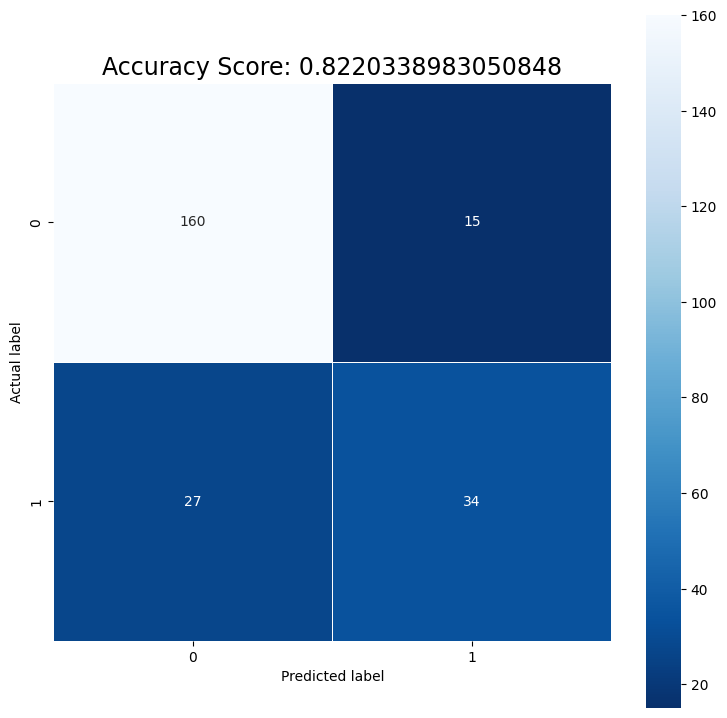

In [36]:
#predictors_array = predictors_chi_norm25
r = 42
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Java Test and Train Dataset
x_train_binary1, x_test_binary1, y_train_binary1, y_test_binary1 = train_test_split(java_binary_predictors_res, java_binary_targets_res, test_size = 0.3, random_state = r)
x_train_multiclass1, x_test_multiclass1, y_train_multiclass1, y_test_multiclass1 = train_test_split(java_multiclass_predictors_res, java_multiclass_targets_res, test_size = 0.3, random_state = r)

# CSharp Test and Train Dataset Positive
x_train_binary2, x_test_binary2, y_train_binary2, y_test_binary2 = train_test_split(csharp_binary_predictors, csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_multiclass2, x_test_multiclass2, y_train_multiclass2, y_test_multiclass2 = train_test_split(csharp_multiclass_predictors, csharp_multiclass_targets, test_size = 0.3, random_state = r)


# CSharp Test and Train Dataset Negative
#x_train_binary3, x_test_binary3, y_train_binary3, y_test_binary3 = train_test_split(csharp_binary_predictors_neg, csharp_binary_targets_neg, test_size = 0.3, random_state = r)
#x_train_multiclass3, x_test_multiclass3, y_train_multiclass3, y_test_multiclass3 = train_test_split(csharp_multiclass_predictors_neg, csharp_multiclass_targets_neg, test_size = 0.3, random_state = r)

# Combine Binary Training Dataset
x_train_binary_combined = np.concatenate([java_binary_predictors_res, x_train_binary2], axis=0)
y_train_binary_combined = np.concatenate([java_binary_targets_res, y_train_binary2], axis=0)

# Combine Binary Test Dataset

# Combine Multiclass Training Dataset
x_train_multiclass_combined = np.concatenate([java_multiclass_predictors_res, x_train_multiclass2], axis=0)
y_train_multiclass_combined = np.concatenate([java_multiclass_targets_res, y_train_multiclass2], axis=0)

# Combine Multiclass Test Dataset

#x_test_multiclass2_final = np.concatenate([x_test_multiclass2, x_test_multiclass3], axis=0)
#y_test_multiclass2_final = np.concatenate([y_test_multiclass2, y_test_multiclass3], axis=0)

x_test_multiclass_combined = np.concatenate([x_test_multiclass1, x_test_multiclass2], axis=0)
y_test_multiclass_combined = np.concatenate([y_test_multiclass1, y_test_multiclass2], axis=0)


# Define the detector model
detector = XGBClassifier(random_state=r, verbosity=0, tree_method='approx', n_estimators=58, max_depth=5,
                         learning_rate=0.24655172413793103, grow_policy='depthwise', booster='gbtree')

detector.fit(x_train_binary_combined, java_binary_targets_res)

predictions_detector = detector.predict(x_test_binary2)

cm = confusion_matrix(y_test_binary2, predictions_detector)

print(classification_report(y_test_binary2, predictions_detector))

score = detector.score(x_test_binary2, y_test_binary2)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       134
         1.0       0.89      0.94      0.91       114

    accuracy                           0.92       248
   macro avg       0.92      0.92      0.92       248
weighted avg       0.92      0.92      0.92       248



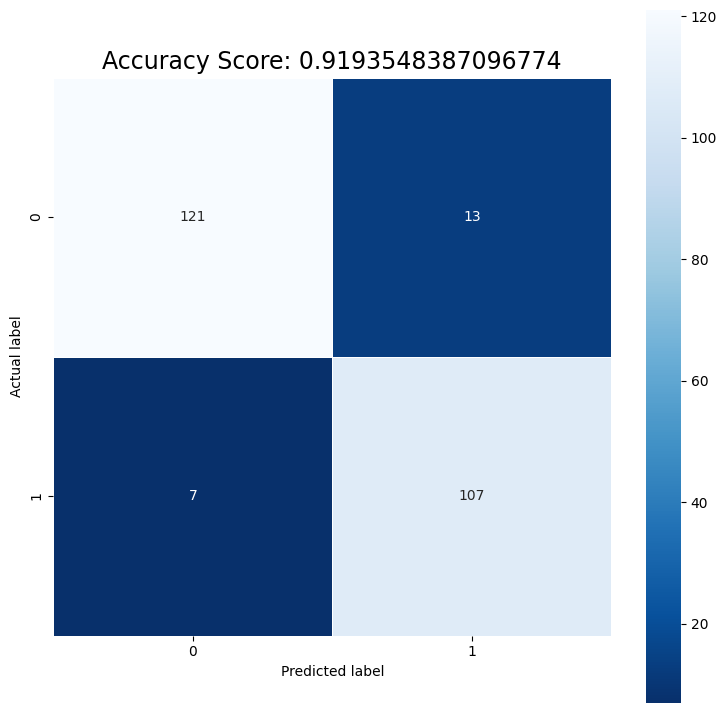

In [ ]:
#predictors_array = predictors_chi_norm25
r = 42
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Java Test and Train Dataset
x_train_binary1, x_test_binary1, y_train_binary1, y_test_binary1 = train_test_split(java_binary_predictors, java_binary_targets, test_size = 0.3, random_state = r)
x_train_multiclass1, x_test_multiclass1, y_train_multiclass1, y_test_multiclass1 = train_test_split(java_multiclass_predictors, java_multiclass_targets, test_size = 0.3, random_state = r)

# CSharp Test and Train Dataset Positive
x_train_binary2, x_test_binary2, y_train_binary2, y_test_binary2 = train_test_split(csharp_binary_predictors, csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_multiclass2, x_test_multiclass2, y_train_multiclass2, y_test_multiclass2 = train_test_split(csharp_multiclass_predictors, csharp_multiclass_targets, test_size = 0.3, random_state = r)

# CSharp Test and Train Dataset Negative
#x_train_binary3, x_test_binary3, y_train_binary3, y_test_binary3 = train_test_split(csharp_binary_predictors_neg, csharp_binary_targets_neg, test_size = 0.3, random_state = r)
#x_train_multiclass3, x_test_multiclass3, y_train_multiclass3, y_test_multiclass3 = train_test_split(csharp_multiclass_predictors_neg, csharp_multiclass_targets_neg, test_size = 0.3, random_state = r)

# Combine Binary Training Dataset
x_train_binary_combined = np.concatenate([x_train_binary1, x_train_binary2], axis=0)
y_train_binary_combined = np.concatenate([y_train_binary1, y_train_binary2], axis=0)

# Combine Binary Test Dataset

#x_test_binary2_final = np.concatenate([x_test_binary2, x_test_binary3], axis=0)
#y_test_binary2_final = np.concatenate([y_test_binary2, y_test_binary3], axis=0)

x_test_binary_combined = np.concatenate([x_test_binary1, x_test_binary2], axis=0)
y_test_binary_combined = np.concatenate([y_test_binary1, y_test_binary2], axis=0)

# Combine Multiclass Training Dataset
x_train_multiclass_combined = np.concatenate([x_train_multiclass1, x_train_multiclass2], axis=0)
y_train_multiclass_combined = np.concatenate([y_train_multiclass1, y_train_multiclass2], axis=0)

# Combine Multiclass Test Dataset

#x_test_multiclass2_final = np.concatenate([x_test_multiclass2, x_test_multiclass3], axis=0)
#y_test_multiclass2_final = np.concatenate([y_test_multiclass2, y_test_multiclass3], axis=0)

x_test_multiclass_combined = np.concatenate([x_test_multiclass1, x_test_multiclass2], axis=0)
y_test_multiclass_combined = np.concatenate([y_test_multiclass1, y_test_multiclass2], axis=0)


# Define the detector model
detector = XGBClassifier(random_state=r, verbosity=0, tree_method='approx', n_estimators=58, max_depth=5,
                         learning_rate=0.24655172413793103, grow_policy='depthwise', booster='gbtree')

detector.fit(x_train_binary_combined, y_train_binary_combined)

predictions_detector = detector.predict(x_test_binary1)

cm = confusion_matrix(y_test_binary1, predictions_detector)

print(classification_report(y_test_binary1, predictions_detector))

score = detector.score(x_test_binary1, y_test_binary1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **Exclude instances of no-smell from the training and test sets**


In [29]:
finish = False
while (finish == False):
  try:
    max = x_train_multiclass_combined.shape[0]
    # Exclude instances of no-smell from the training set (targets)
    for i in range(0, max):
      if (y_train_multiclass_combined[i] == 0):
        y_train_multiclass_combined = np.delete(y_train_multiclass_combined, i, axis = 0)
        x_train_multiclass_combined = np.delete(x_train_multiclass_combined, i, axis = 0)
        i = 0
        max = max - 1
    finish = True
    print("The deletion is over in the y_train set!")
  except:
    finish == False


finish = False
while (finish == False):
  try:
    max = x_test_multiclass2.shape[0]
    # Exclude instances of no-smell from the test set (predictors)
    for i in range(0, max):
      if (y_test_multiclass2[i] == 0):
        y_test_multiclass2 = np.delete(y_test_multiclass2, i, axis = 0)
        x_test_multiclass2 = np.delete(x_test_multiclass2, i, axis = 0)
        i = 0
        max = max - 1
    finish = True
    print("The deletion is over in the x_train set!")
  except:
    finish = False

The deletion is over in the y_train set!
The deletion is over in the x_train set!


# Prepare training and test set for applying XGBoost

In [30]:
for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 1.0:
      y_train_multiclass_combined[j]= 0.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 1.0:
      y_test_multiclass2[j]= 0.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 2.0:
      y_train_multiclass_combined[j]= 1.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 2.0:
      y_test_multiclass2[j]= 1.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 3.0:
      y_train_multiclass_combined[j]= 2.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 3.0:
      y_test_multiclass2[j]= 2.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 4.0:
      y_train_multiclass_combined[j]= 3.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 4.0:
      y_test_multiclass2[j]= 3.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 5.0:
      y_train_multiclass_combined[j]= 4.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 5.0:
      y_test_multiclass2[j]= 4.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 6.0:
      y_train_multiclass_combined[j]= 5.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 6.0:
      y_test_multiclass2[j]= 5.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 7.0:
      y_train_multiclass_combined[j]= 6.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 7.0:
      y_test_multiclass2[j]= 6.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 8.0:
      y_train_multiclass_combined[j]= 7.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 8.0:
      y_test_multiclass2[j]= 7.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 9.0:
      y_train_multiclass_combined[j]= 8.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 9.0:
      y_test_multiclass2[j]= 8.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 10.0:
      y_train_multiclass_combined[j]= 9.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 10.0:
      y_test_multiclass2[j]= 9.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 11.0:
      y_train_multiclass_combined[j]= 10.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 11.0:
      y_test_multiclass2[j]= 10.0

for j in range(len(y_train_multiclass_combined)):
    if y_train_multiclass_combined[j] == 12.0:
      y_train_multiclass_combined[j]= 11.0

for j in range(len(y_test_multiclass2)):
    if y_test_multiclass2[j] == 12.0:
      y_test_multiclass2[j]= 11.0

# **Code Smell Severity Classification with three ensemble method**


# **OVERSAMPLING BORDERLINESMOTE**

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass_combined, y_train_multiclass_combined)

# **RANDOM FOREST**

# **Randomized**

{'n_estimators': 524, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 13, 'criterion': 'entropy', 'bootstrap': False};99.53;73.77
              precision    recall  f1-score   support

         8.0       0.00      0.00      0.00         0
         9.0       0.73      0.94      0.82        34
        10.0       0.77      0.50      0.61        20
        11.0       1.00      0.43      0.60         7

    accuracy                           0.74        61
   macro avg       0.62      0.47      0.51        61
weighted avg       0.77      0.74      0.72        61



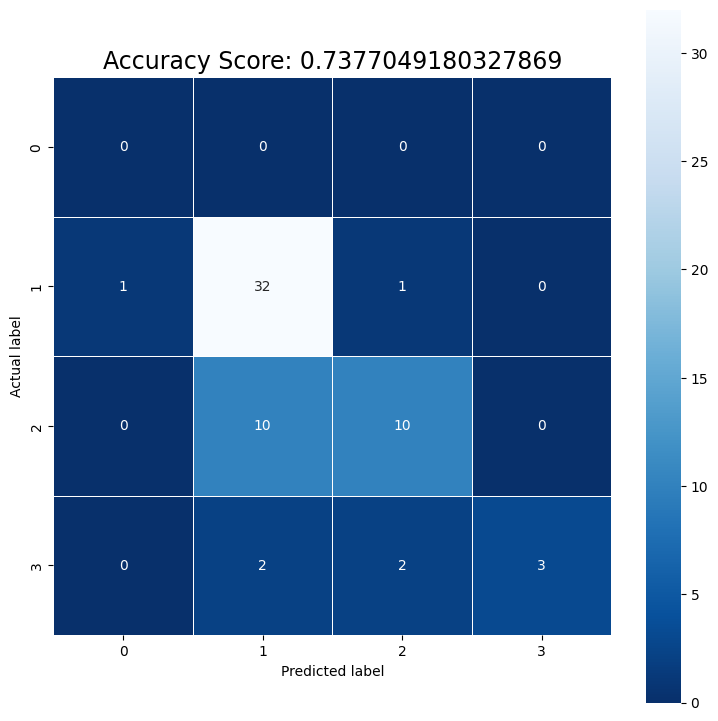

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'n_estimators': np.arange(50, 1000, 2),
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass_combined, y_train_multiclass_combined)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_

y_pred_test = best_estimator.predict(x_test_multiclass2)
accuracy_test = accuracy_score(y_test_multiclass2, y_pred_test)

y_pred_train = best_estimator.predict(x_train_multiclass_combined)
accuracy_train = accuracy_score(y_train_multiclass_combined, y_pred_train)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass2, y_pred_test)

print(classification_report(y_test_multiclass2, y_pred_test))

score = best_estimator.score(x_test_multiclass2, y_test_multiclass2)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BoderlineSMOTE**

{'n_estimators': 524, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 13, 'criterion': 'entropy', 'bootstrap': False};99.81;77.05
              precision    recall  f1-score   support

           9       0.82      0.97      0.89        34
          10       0.69      0.55      0.61        20
          11       0.60      0.43      0.50         7

    accuracy                           0.77        61
   macro avg       0.70      0.65      0.67        61
weighted avg       0.75      0.77      0.75        61



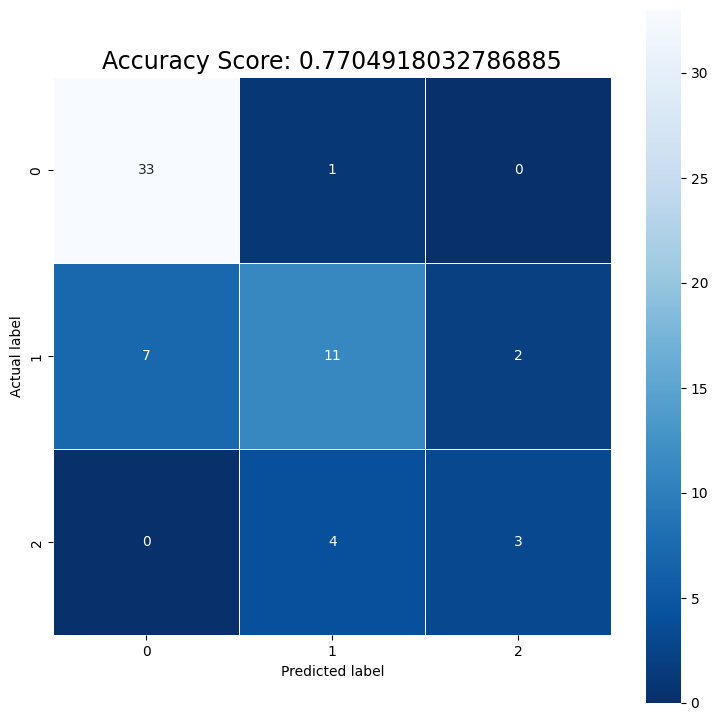

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'n_estimators': np.arange(50, 1000, 2),
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass_res, y_train_multiclass_res)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_

y_pred_test = best_estimator.predict(x_test_multiclass2)
accuracy_test = accuracy_score(y_test_multiclass2, y_pred_test)

y_pred_train = best_estimator.predict(x_train_multiclass_res)
accuracy_train = accuracy_score(y_train_multiclass_res, y_pred_train)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass2, y_pred_test)

print(classification_report(y_test_multiclass2, y_pred_test))

score = best_estimator.score(x_test_multiclass2, y_test_multiclass2)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **EXTREME GRADIENTE BOOSTING (XGBOOST)**

# **Randomized**

{'tree_method': 'approx', 'objective': 'multi:softmax', 'n_estimators': 626, 'max_depth': 3, 'learning_rate': 0.41551724137931034, 'grow_policy': 'lossguide', 'booster': 'gbtree'};99.93;78.69
              precision    recall  f1-score   support

           9       0.82      0.97      0.89        34
          10       0.71      0.60      0.65        20
          11       0.75      0.43      0.55         7

    accuracy                           0.79        61
   macro avg       0.76      0.67      0.70        61
weighted avg       0.78      0.79      0.77        61



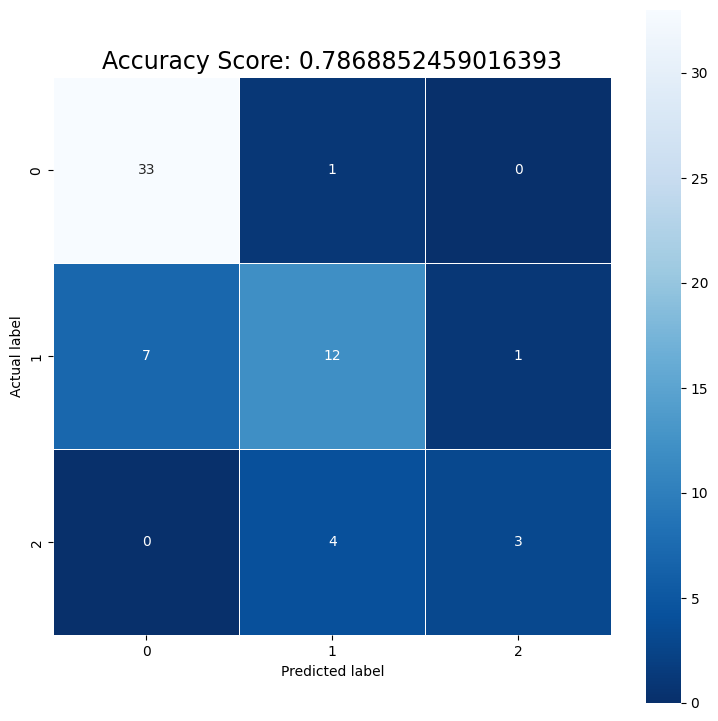

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the XGBoost model
xg = XGBClassifier(num_class=12, random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['multi:softprob', 'multi:softmax'],
    'n_estimators': np.arange(50, 1000, 2),
    'max_depth': np.arange(1, 20, 1),
    'booster' : ['gbtree', 'dart'],
    'tree_method' : ['approx', 'hist'],
    'grow_policy' : ['depthwise', 'lossguide'],
    'learning_rate' : np.linspace(0.01, 0.5, 30)
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xg, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass_combined, y_train_multiclass_combined)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_

y_pred_test = best_estimator.predict(x_test_multiclass2)
accuracy_test = accuracy_score(y_test_multiclass2, y_pred_test)

y_pred_train = best_estimator.predict(x_train_multiclass_combined)
accuracy_train = accuracy_score(y_train_multiclass_combined, y_pred_train)


print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass2, y_pred_test)

print(classification_report(y_test_multiclass2, y_pred_test))

score = best_estimator.score(x_test_multiclass2, y_test_multiclass2)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BoderlineSMOTE**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the XGBoost model
xg = XGBClassifier(num_class=12, random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['multi:softprob', 'multi:softmax'],
    'n_estimators': np.arange(50, 1000, 2),
    'max_depth': np.arange(1, 20, 1),
    'booster' : ['gbtree', 'dart'],
    'tree_method' : ['approx', 'hist'],
    'grow_policy' : ['depthwise', 'lossguide'],
    'learning_rate' : np.linspace(0.01, 0.5, 30)
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xg, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass_res, y_train_multiclass_res)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_

y_pred_test = best_estimator.predict(x_test_multiclass2)
accuracy_test = accuracy_score(y_test_multiclass2, y_pred_test)

y_pred_train = best_estimator.predict(x_train_multiclass_res)
accuracy_train = accuracy_score(y_train_multiclass_res, y_pred_train)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass2, y_pred_test)

print(classification_report(y_test_multiclass2, y_pred_test))

score = best_estimator.score(x_test_multiclass2, y_test_multiclass2)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **CATEGORICAL BOOSTING (CATBOOST)**

In [ ]:
pip install catboost

# **Randomized**

MultiClassOneVsAll

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the CatBoost model
cat = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False, classes_count=12, objective='MultiClass')

# Define the hyperparameter grid for the search
param_dist = {
    #'objective': ['MultiClass', 'MultiClassOneVsAll'],
    'iterations': np.arange(50, 1000, 2),
    'depth': np.arange(1, 16, 1),
    'learning_rate': np.linspace(0.01, 0.5, 30),
    'l2_leaf_reg': np.arange(1, 10, 1),
    'border_count': np.arange(32, 256, 16),
    'feature_border_type' : ['Median', 'Uniform', 'UniformAndQuantiles', 'GreedyLogSum', 'MaxLogSum', 'MinEntropy'],
    'leaf_estimation_method' : ['Newton', 'Gradient'],
    'auto_class_weights' : ['Balanced', 'SqrtBalanced'],
    'grow_policy' : ['SymmetricTree', 'Lossguide', 'Depthwise'],
    'bootstrap_type' : ['Bayesian', 'Bernoulli', 'MVS', 'No']
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=cat, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42)

# Adjust the model
random_search.fit(x_train_multiclass_combined, y_train_multiclass_combined)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_

y_pred_test = best_estimator.predict(x_test_multiclass2)
accuracy_test = accuracy_score(y_test_multiclass2, y_pred_test)

y_pred_train = best_estimator.predict(x_train_multiclass_combined)
accuracy_train = accuracy_score(y_train_multiclass_combined, y_pred_train)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass2, y_pred_test)

print(classification_report(y_test_multiclass2, y_pred_test))

score = best_estimator.score(x_test_multiclass2, y_test_multiclass2)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

#**BorderlineSMOTE**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the CatBoost model
cat = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False, classes_count=12, objective='MultiClass')

# Define the hyperparameter grid for the search
param_dist = {
    'iterations': np.arange(50, 1000, 2),
    'depth': np.arange(1, 16, 1),
    'learning_rate': np.linspace(0.01, 0.5, 30),
    'l2_leaf_reg': np.arange(1, 10, 1),
    'border_count': np.arange(32, 256, 16),
    'feature_border_type' : ['Median', 'Uniform', 'UniformAndQuantiles', 'GreedyLogSum', 'MaxLogSum', 'MinEntropy'],
    'leaf_estimation_method' : ['Newton', 'Gradient'],
    'auto_class_weights' : ['Balanced', 'SqrtBalanced'],
    'grow_policy' : ['SymmetricTree', 'Lossguide', 'Depthwise'],
    'bootstrap_type' : ['Bayesian', 'Bernoulli', 'MVS', 'No']
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=cat, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42)

# Adjust the model
random_search.fit(x_train_multiclass_res, y_train_multiclass_res)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_

y_pred_test = best_estimator.predict(x_test_multiclass2)
accuracy_test = accuracy_score(y_test_multiclass2, y_pred_test)

y_pred_train = best_estimator.predict(x_train_multiclass_res)
accuracy_train = accuracy_score(y_train_multiclass_res, y_pred_train)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass2, y_pred_test)

print(classification_report(y_test_multiclass2, y_pred_test))

score = best_estimator.score(x_test_multiclass2, y_test_multiclass2)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()